# Homework 3 - Packages, Pandas, and Matplotlib

In [1]:
# Problem Set Settings - DO NOT CHANGE ANYTHING IN THE CELL.
import random, pickle
import numpy as np
import matplotlib.pyplot as plt

from hwk3Preamble import *
print(welcomeMessage)

Welcome to Homework 3!
    This homework is designed to test your understanding of packages, reading and writing files, 
    using Pandas, and plotting in Python. Please answer the questions in the homework by filling 
    in the variables q1, q2, etc. Each time you fill in a variables, run the saveResults('q',q) 
    function to save your answers. Make sure not to change the variable names or overwrite your 
    answers in subsequent questions!

    Please Note -- this assignment has several questions that will require you to update your 
    README.md file with the answers. Please be sure to do this before submitting your assignment.
    Any requested figures should be saved as .png files in your repository and should be added
    to your README.md file as well.  All figures should include captions that describe the figure, 
    labels for the axes (if applicable), and a figure legend (if applicable).

    Note, you might need to install the matplotlib and pandas packages to complete

## Part 1 - Packages

In [10]:
# Q1 - Find the docstring for the numpy function "randint" in the module "random" 
# within the numpy package.  Save this docstring as a string in the variable q1.  
# Do not include the triple quotes.

import numpy as np
q1 = np.random.randint.__doc__

print(q1)

saveResults('q1', q1)


        randint(low, high=None, size=None, dtype=int)

        Return random integers from `low` (inclusive) to `high` (exclusive).

        Return random integers from the "discrete uniform" distribution of
        the specified dtype in the "half-open" interval [`low`, `high`). If
        `high` is None (the default), then results are from [0, `low`).

        .. note::
            New code should use the `~numpy.random.Generator.integers`
            method of a `~numpy.random.Generator` instance instead;
            please see the :ref:`random-quick-start`.

        Parameters
        ----------
        low : int or array-like of ints
            Lowest (signed) integers to be drawn from the distribution (unless
            ``high=None``, in which case this parameter is one above the
            *highest* such integer).
        high : int or array-like of ints, optional
            If provided, one above the largest (signed) integer to be drawn
            from the distribution (s

## Part 2 - Reading and writing files

In [11]:
# Q2 - generate a text file called 'lots_of_potatos.txt' that contains the string: 
#'1 potato, 2 potato, 3 potato, ... , [n2] potato' where n2 is given as a variable.
print(f'n2 = {n2}')

potato_string = ", ".join(f"{i} potato" for i in range(1, n2 + 1))
with open("lots_of_potatos.txt", "w") as file:
    file.write(potato_string)

n2 = 933


In [19]:
# Q3 - open the text file 'data3.txt', which contains a genomic sequence (e.g., 'GATTC...') and write 
# a new file 'data3Complementary.txt' that contains its complementary sequence (e.g., 'CTAAG...').

complement = {"A": "T", "T": "A", "C": "G", "G": "C"}

with open("data3.txt", "r") as infile:
    sequence = infile.read().strip() 

complementary_sequence = "".join(complement[base] for base in sequence)

with open("data3Complementary.txt", "w") as outfile:
    outfile.write(complementary_sequence)


## Part 3 - Pandas

The Breast Cancer Wisconsin (Diagnostic) dataset was collected as part of a research effort led by Dr. William H. Wolberg at the University of Wisconsin. The study aimed to advance the diagnosis of breast cancer through the analysis of digitized images obtained from fine needle aspirates (FNA) of breast masses. Fine needle aspiration is a minimally invasive technique that involves extracting cell samples from a breast mass using a thin needle.

The dataset comprises features computed from these digitized FNA images, capturing various characteristics of cell nuclei. These features include measures related to the radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. Each instance in the dataset is associated with a diagnosis label indicating whether the observed breast mass is malignant (cancerous) or benign (non-cancerous).

The dataset has been widely used in machine learning and medical research for tasks such as classification, where the goal is to develop models that can accurately distinguish between malignant and benign cases based on the provided features. It serves as a valuable resource for exploring computational approaches to breast cancer diagnosis and contributes to ongoing efforts to enhance medical decision-making processes.

In [14]:
# Q4 - Use Pandas to open the provided data file 'wdbc.data' (Wisconsin Database for Breast Cancer) 
# using the provided columns names. Then, determine how many patients have been classified as Benign,
# and return this valuie as q4.

column_names = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
                "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
                "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se",
                "concave_points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst",
                "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst",
                "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"]

import pandas as pd
data = pd.read_csv("wdbc.data", names=column_names)


q4 = (data["diagnosis"] == "B").sum()

saveResults('q4', q4)
print(q4)
saveResults('q4', q4)

357


In [15]:
# Q5 - for each feature in the previous data set (other than 'id' and 'diagnosis'), determine the average 
# (arithmetic mean) of the that property for (M)alignant and (B)enign tumors.  
# Save this as a csv file 'q5data.csv' with the 
# column names  ["radius_mean", "texture_mean",...].
# and row names ['Malignant', 'Benign'].

import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target  # 0 = Malignant, 1 = Benign

mean_values = df.groupby('diagnosis').mean()
mean_values.index = ['Malignant', 'Benign']

mean_values.to_csv('q5data.csv', index=True)


## Part 4 - Matplotlib

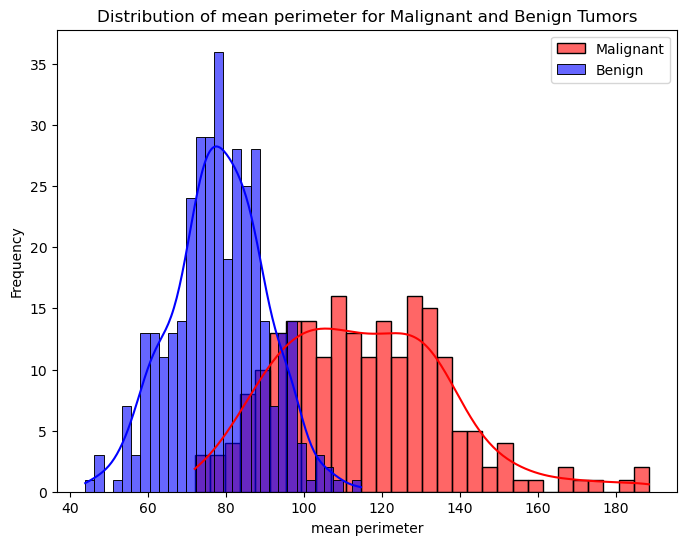

In [16]:
# Q6 - (2 points, but not autograded) Pick one feature and make two histograms on the SAME axes showing
# the distribution of that feature for Malignant and Benign tumors.  Make sure to label your axes and
# include a legend.  Try to choose the best feature so that the histograms of malignant and benign tumors
# appear to be as dissimilar as possible.  (Hint: you can use the 'alpha' keyword to make the histograms
# semi-transparent.)  Save this as a png file, with name 'q6.png' and include this in the README for your repository.
# In your README, please refer to this as Figure 1.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = Malignant, 1 = Benign

feature = 'mean perimeter'  # Example feature; adjust as needed

plt.figure(figsize=(8, 6))
sns.histplot(df[df['target'] == 0][feature], color='red', label='Malignant', kde=True, alpha=0.6, bins=30)
sns.histplot(df[df['target'] == 1][feature], color='blue', label='Benign', kde=True, alpha=0.6, bins=30)

plt.xlabel(feature)
plt.ylabel('Frequency')
plt.title(f'Distribution of {feature} for Malignant and Benign Tumors')
plt.legend()

plt.savefig('q6.png', dpi=300)
plt.show()



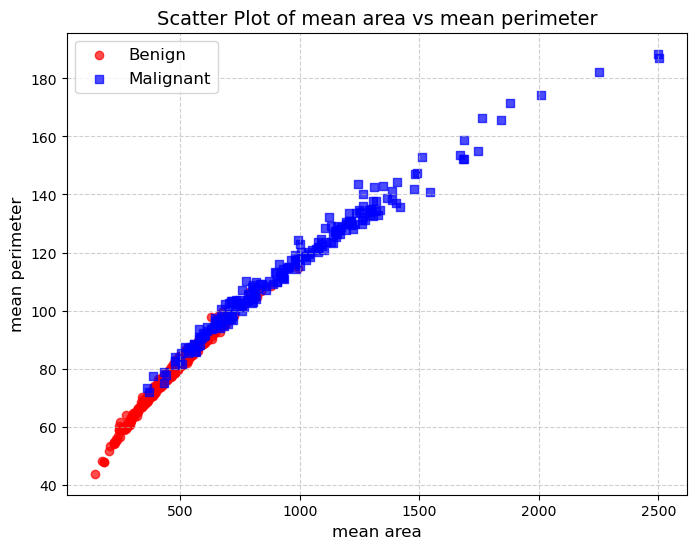

In [17]:
# Q7 - (2 points, but not autograded) Pick two features and make a scatter plot in which each benign patient 
# is represented by a red circle and each malignant patient is represented by a blue square.  
# Try to pick two features where there is as little overlap as possible between the benign and malignant samples.
# Make sure to add axes lables and legends to your figure and make sure that all fonts are easy to read.
# Save your figure as a jpg file called 'q7.jpg' and include this as an image in the README for your repository.
# In your README, please refer to this as Figure 2.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = Malignant, 1 = Benign

feature_x = 'mean area'     # Adjust as needed
feature_y = 'mean perimeter' # Adjust as needed

plt.figure(figsize=(8, 6))
plt.scatter(df[df['target'] == 1][feature_x], df[df['target'] == 1][feature_y], 
            color='red', marker='o', label='Benign', alpha=0.7)
plt.scatter(df[df['target'] == 0][feature_x], df[df['target'] == 0][feature_y], 
            color='blue', marker='s', label='Malignant', alpha=0.7)

plt.xlabel(feature_x, fontsize=12)
plt.ylabel(feature_y, fontsize=12)
plt.title(f'Scatter Plot of {feature_x} vs {feature_y}', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('q7.jpg', dpi=300)
plt.show()

# Part 5 - PCA

[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908878e-08
 6.99641648e-09 4.78318305e-09 2.93549213e-09 1.41684926e-09
 8.29577731e-10 5.20405880e-10 4.08463983e-10 3.63313376e-10
 1.72849736e-10 1.27487508e-10 7.72682973e-11 6.28357716e-11
 3.57302295e-11 2.76396041e-11 8.14452259e-12 6.30211541e-12
 4.43666944e-12 1.55344680e-12]


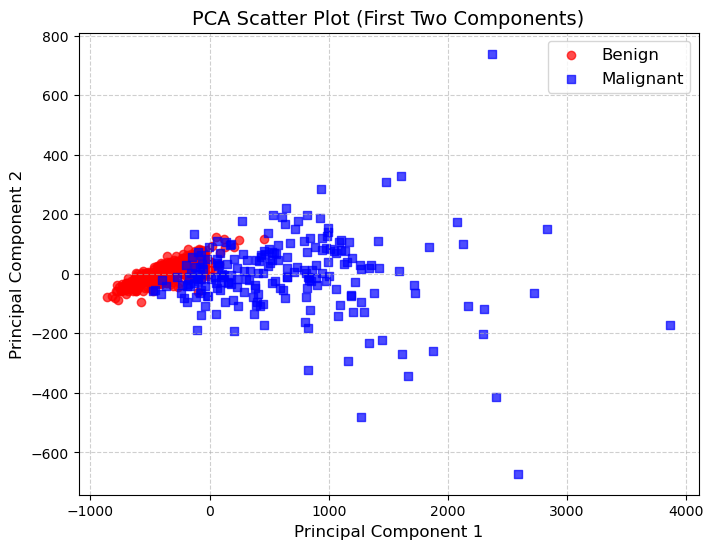

In [ ]:
# Q8.  Perform principle component analysis on the data set. Calculate the fraction of the total variance
# explained by each principle component, and save this as variable q8 (1 point, autograded).  Then,
# make a scatter plot (1 pt) of the first two principle components, with each benign patient
# represented by a red circle and each malignant patient represented by a blue square.
# Make sure to add axes labels and legends to your figure, and make sure that all fonts are easy to read.
# Save your figure as a jpg file called 'q8.jpg' and include this as an image in the README for your repository.
# In your README, please refer to this as Figure 3.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target  # 0 = Malignant, 1 = Benign

pca = PCA(n_components=len(data.feature_names))
pca_result = pca.fit_transform(df.iloc[:, :-1])

q8 = pca.explained_variance_ratio_
print(q8)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[df['diagnosis'] == 1, 0], pca_result[df['diagnosis'] == 1, 1], 
            color='red', marker='o', label='Benign', alpha=0.7)
plt.scatter(pca_result[df['diagnosis'] == 0, 0], pca_result[df['diagnosis'] == 0, 1], 
            color='blue', marker='s', label='Malignant', alpha=0.7)

plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('PCA Scatter Plot (First Two Components)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('q8.jpg', dpi=300)
plt.show()



In [10]:
#Q9. (3 pts) Update your README to include four short paragraphs that describe the above plots and what you learned 
# from them.  The first paragraph should describe the data set. The second paragraph should describe Figure 1, 
# the third paragraph should describe Figure 2, and the fourth paragraph should describe Figure 3.  Make sure to
# include the names of the figures in your descriptions, and make sure that your descriptions are clear and easy 
# to understand.  You should also include a short paragraph at the end of your README that describes how you
# completed this assignment.

#No code required for this question.



In [11]:
# Q10 (no points, but required to get credit for the assignment). Describe any resources or AI you used other than the lecture
# notes and the textbook.  You should also include a description of any help you received from anyone other than
# the instructor and the TA.  Finally, you should include a description of any help you provided to anyone else
# on this assignment (including the instructor and the TA).  If you did not receive any help and did not provide
# any help, then you should say so explicitly.